In [3]:
import pandas as pd

# Read the CSV files
df_oct4 = pd.read_csv('oct-4.csv')
df_oct24 = pd.read_csv('oct-24.csv')
df_oct13 = pd.read_csv('oct-13.csv')
df_exp_2 = pd.read_csv('2-experiment.csv')

# df_oct4['ScenarioPath'] = 2.0
df_exp_2['Date'] = 'dec-6'
# df_oct24['ScenarioPath'] = 2.0
# df_oct13['ScenarioPath'] = 2.0

# Concatenate the DataFrames
df = pd.concat([df_oct4, df_oct24])
df["Type"] = "Value"

# Display the DataFrame
print(df)
df_filtered = df[df['Iteration'] % 5 == 0]

df_max = df_oct24.groupby('Date').max()
df_max['Type'] = 'Max'
df_max['Date'] = 'oct-24'

df_min = df_oct24.groupby('Date').min()
df_min['Type'] = 'Min'
df_min['Date'] = 'oct-24'

df_filtered = df_filtered.append(df_max)
df_filtered = df_filtered.append(df_min)

df_max = df_oct4.groupby('Date').max()
df_max['Type'] = 'Max'
df_max['Date'] = 'oct-4'

df_min = df_oct4.groupby('Date').min()
df_min['Type'] = 'Min'
df_min['Date'] = 'oct-4'

df_filtered = df_filtered.append(df_max)
df_filtered = df_filtered.append(df_min)

# Save the DataFrame to a CSV file
df_filtered.to_csv('combined.csv', index=False)

    Iteration  Average Joules    Date   Type
0           1      475.692581   oct-4  Value
1           2      485.407212   oct-4  Value
2           3      442.030472   oct-4  Value
3           4      182.110595   oct-4  Value
4           5       61.936386   oct-4  Value
5           6      420.055160   oct-4  Value
6           7      420.341827   oct-4  Value
7           8      402.180405   oct-4  Value
8           9      431.486756   oct-4  Value
9          10      405.419434   oct-4  Value
10         11      413.832107   oct-4  Value
11         12      406.167480   oct-4  Value
12         13      413.460128   oct-4  Value
13         14      381.174179   oct-4  Value
14         15      387.092621   oct-4  Value
15         16      435.025329   oct-4  Value
16         17      423.083863   oct-4  Value
17         18      429.419144   oct-4  Value
18         19      376.798172   oct-4  Value
19         20      380.214844   oct-4  Value
20         21      298.942337   oct-4  Value
21        

/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_47313/2590896756.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered = df_filtered.append(df_max)
/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_47313/2590896756.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered = df_filtered.append(df_min)
/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_47313/2590896756.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered = df_filtered.append(df_max)
/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_47313/2590896756.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fi

In [12]:
df_exp_2 = pd.read_csv('2-experiment.csv')

# Filter for 'ScenarioPath' 2
df_exp_2 = df_exp_2[df_exp_2['ScenarioPath'] == 2]

# Filter out every 10th iteration
df_filtered = df_exp_2[df_exp_2['Iteration'] % 10 == 0]

# Group by 'Iteration' and calculate mean 'Average Joules'
grouped_df = df_filtered.groupby('Iteration')['Average Joules'].mean().reset_index()
grouped_df['Type'] = 'Value'

# Calculate min and max 'Average Joules'
df_min = df_exp_2['Average Joules'].min()
df_min = pd.DataFrame({'Iteration': ['All'], 'Average Joules': [df_min], 'Type': ['Min']})

df_max = df_exp_2['Average Joules'].max()
df_max = pd.DataFrame({'Iteration': ['All'], 'Average Joules': [df_max], 'Type': ['Max']})

# Append min and max rows to the grouped DataFrame
grouped_df = grouped_df.append(df_min).append(df_max)

# Pivot the DataFrame
df_pivot = grouped_df.pivot(index='Type', columns='Iteration', values='Average Joules')

df_pivot = df_pivot.round(2)

# Display the DataFrame
print(df_pivot)

# Save the DataFrame to a CSV file
df_pivot.to_csv('experiment-2.csv')

Iteration     10     20    30    All
Type                                
Max          NaN    NaN   NaN  74.03
Min          NaN    NaN   NaN  61.54
Value      66.27  65.55  65.5    NaN


/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_47313/1565341696.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append(df_min).append(df_max)


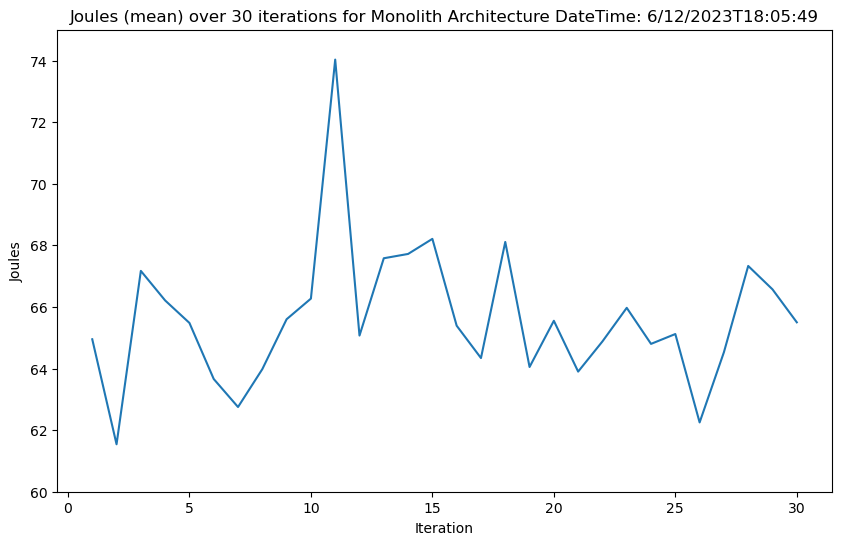

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('experiment-2-1.csv', header=None)
df = df.T.reset_index(drop=True)
df.columns = ['Iteration', 'Joules']

# Convert 'Iteration' to int for proper plotting
df['Iteration'] = df['Iteration'].astype(int)

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Iteration', y='Joules')
plt.title('Joules (mean) over 30 iterations for Monolith Architecture DateTime: 6/12/2023T18:05:49')
# plt.ylim(0, 75)
plt.ylim(60, 75)

plt.savefig('joules_scenario_2_mean.png', bbox_inches='tight', dpi=300)
plt.show()
# Transpose the DataFrame,

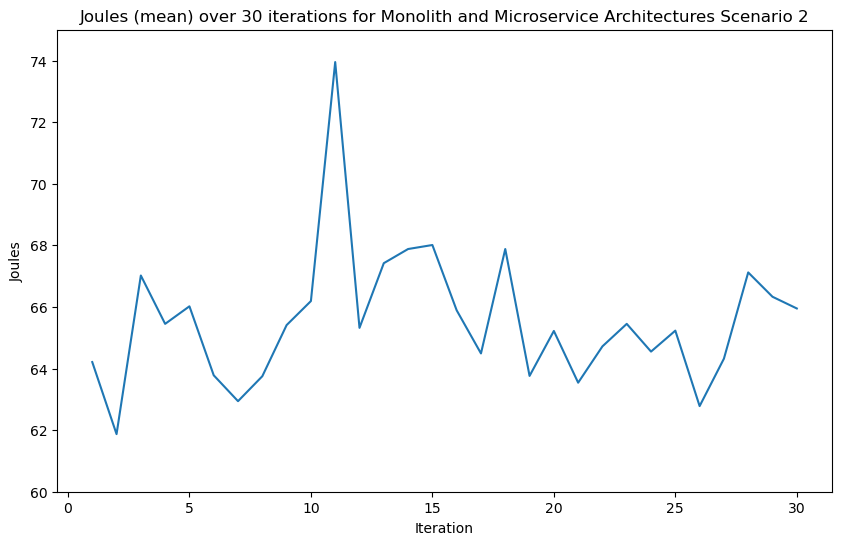

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('experiment-2-2.csv', header=None)
df = df.T.reset_index(drop=True)
df.columns = ['Iteration', 'Joules']

# Convert 'Iteration' to int for proper plotting
df['Iteration'] = df['Iteration'].astype(int)

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Iteration', y='Joules')
plt.title('Joules (mean) over 30 iterations for Monolith and Microservice Architectures Scenario 2')
plt.savefig('joules_scenario_2_mean.png', bbox_inches='tight', dpi=300)
plt.ylim(60, 75)

plt.show()
# Transpose the DataFrame,

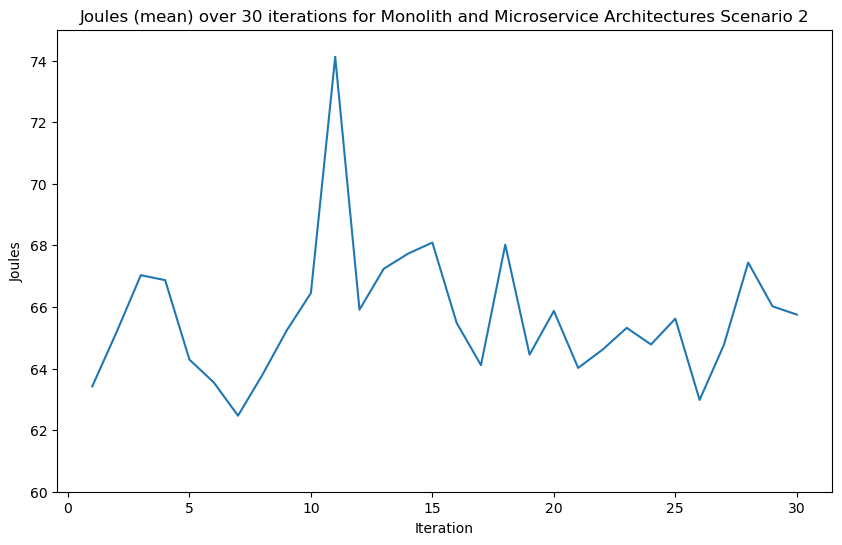

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('experiment-2-3.csv', header=None)
df = df.T.reset_index(drop=True)
df.columns = ['Iteration', 'Joules']

# Convert 'Iteration' to int for proper plotting
df['Iteration'] = df['Iteration'].astype(int)

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Iteration', y='Joules')
plt.title('Joules (mean) over 30 iterations for Monolith and Microservice Architectures Scenario 2')
plt.ylim(60, 75)
plt.savefig('joules_scenario_2_mean.png', bbox_inches='tight', dpi=300)
plt.show()
# Transpose the DataFrame,